On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?

In [11]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# import data
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


First, I want to look into the distribution of the `order_amount` column.

In [29]:
# isolating the order amount column
oa = df['order_amount']

In [52]:
# measures of central tendency

# mean
mean = oa.mean()
print(f'Order amount mean: ${mean:0.2f}')

# median
median = oa.median()
print(f'Order amount median: ${median:0.2f}')

# mode
mode = oa.mode()[0]
print(f'Order amount mode: ${mode:0.2f}')

Order amount mean: $3145.13
Order amount median: $284.00
Order amount mode: $153.00


**The measures of central tendency are not at all equal, which suggests a skewed distribution or the presence of outliers.  A better way to evaluate the data would be to look into the distribution of the order amounts (via a histogram) in order to see what value(s) may better represent the data instead of the mean.**

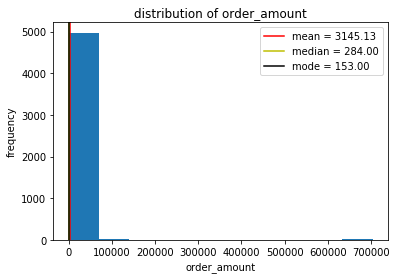

In [59]:
# histogram of order_amount
plt.figure()
plt.hist(oa)
plt.title('distribution of order_amount')
plt.axvline(mean, c='r', label=f'mean = {mean:0.2f}')
plt.axvline(median, c='y', label=f'median = {median:0.2f}')
plt.axvline(mode, c='black', label=f'mode = {mode:0.2f}')
plt.legend()
plt.xlabel('order_amount')
plt.ylabel('frequency')
plt.show()

One bin seems to contain the majority of the data, and there are a few bins which have what could be considered as outliers.

Let's try to "zoom in" on the first bin, where most of our data is.

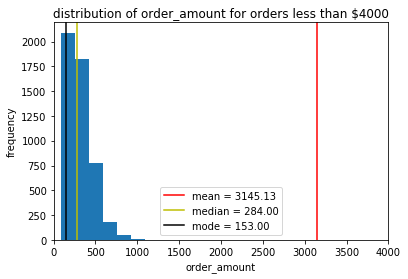

In [63]:
# zoom in on first bin of order_amount histogram

m = 4000 # arbitrary choice of max value of x-axis
plt.figure()
plt.hist(oa[oa < m])
plt.axvline(mean, c='r', label=f'mean = {mean:0.2f}')
plt.axvline(median, c='y', label=f'median = {median:0.2f}')
plt.axvline(mode, c='black', label=f'mode = {mode:0.2f}')
plt.legend(loc='best')
plt.title(f'distribution of order_amount for orders less than ${m}')
plt.xlabel('order_amount')
plt.ylabel('frequency')
plt.xlim(0, m)
plt.show()

Compared to where most of our data is, our mean is significantly larger.  This suggests that either the median or mode are more representative of the central tendency of the data instead of the mean.  Again, this is a consequence of having a skewed distribution and outliers.

**I would report the median metric for this dataset, as it seems to best represent the "centre" of the majority of the dataset.  The value for the median is $284.**

I want to quickly look into the outliers:

In [78]:
# analyzing the order amounts that appear in the higher bins
oa.value_counts().sort_index(ascending=False).head(10)

704000    17
154350     1
102900     1
77175      9
51450     16
25725     19
1760       1
1408       2
1086       1
1064       1
Name: order_amount, dtype: int64

17 transactions had order amounts of $704,000.

In [77]:
# percentage of the order amount sum that is the outliers
(704000*17) / oa.sum() * 100

76.10501067047191

The sum of the high outlier transactions contains 76.1% of the money spent in this dataset.